In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
video_juegos = pd.read_csv('csv/vgsales.csv')

In [3]:
video_juegos.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
video_juegos.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
video_juegos.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Análisis de valores nulos
---


In [6]:
def porcentNull(video_juegos):
    null_sumary = pd.DataFrame()
    for name_column in video_juegos.columns:    
        cont_null = np.sum(pd.isnull(video_juegos[name_column]))
        r = pd.DataFrame({
            'columna': [name_column],
            'cantidad_nulos': [cont_null],
            'Porcentaje': [cont_null/video_juegos[name_column].shape[0]]
        })
        null_sumary = pd.concat([ null_sumary, r])
    return null_sumary

In [7]:
porcentNull(video_juegos)

,columna,cantidad_nulos,Porcentaje
0,Rank,0,0.000000
0,Name,0,0.000000
0,Platform,0,0.000000
0,Year,271,0.016327
0,Genre,0,0.000000
0,Publisher,58,0.003494
0,NA_Sales,0,0.000000
0,EU_Sales,0,0.000000
0,JP_Sales,0,0.000000
0,Other_Sales,0,0.000000


Limpieza de valores nulos
---
Se eliminaron los valores nulos al no tener representatividad

In [8]:
df = video_juegos.loc[~(pd.isnull(video_juegos['Year']) | pd.isnull(video_juegos['Publisher'])), :].copy()

In [97]:
porcentNull(df)

,columna,cantidad_nulos,Porcentaje
0,Rank,0,0.0
0,Name,0,0.0
0,Platform,0,0.0
0,Year,0,0.0
0,Genre,0,0.0
0,Publisher,0,0.0
0,NA_Sales,0,0.0
0,EU_Sales,0,0.0
0,JP_Sales,0,0.0
0,Other_Sales,0,0.0


In [9]:
df.groupby(["Publisher"]).agg({'Publisher': ['count']}).shape
#Cantidad de Publisher diferentes

(576, 1)

In [10]:
x = df['Year'].value_counts()/ df['Year'].shape[0]
x

2009.0    0.087840
2008.0    0.087656
2010.0    0.077159
2007.0    0.073722
2011.0    0.069732
2006.0    0.061875
2005.0    0.057455
2002.0    0.050887
2003.0    0.047572
2004.0    0.045669
2012.0    0.040206
2015.0    0.037690
2014.0    0.035602
2013.0    0.033515
2001.0    0.029587
1998.0    0.023264
2000.0    0.021423
2016.0    0.020993
1999.0    0.020748
1997.0    0.017740
1996.0    0.016144
1995.0    0.013443
1994.0    0.007427
1993.0    0.003683
1981.0    0.002824
1992.0    0.002639
1991.0    0.002517
1982.0    0.002210
1986.0    0.001289
1989.0    0.001044
1983.0    0.001044
1990.0    0.000982
1987.0    0.000982
1988.0    0.000921
1985.0    0.000859
1984.0    0.000859
1980.0    0.000552
2017.0    0.000184
2020.0    0.000061
Name: Year, dtype: float64

In [11]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7998761e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7998780430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7998761b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79987809d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7998780ca0>],
 'means': []}

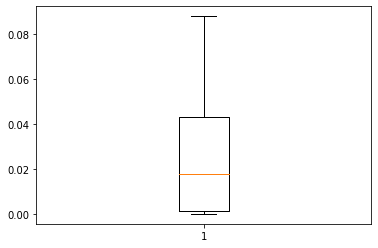

In [12]:
plt.boxplot(x)

<AxesSubplot:xlabel='Year', ylabel='EU_Sales'>

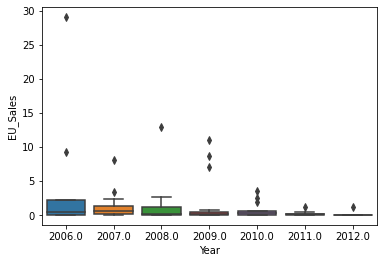

In [13]:
sns.boxplot( data=df.loc[ (df['Platform']=='Wii') & (df['Publisher'] == 'Nintendo'),:]  , x="Year" , y="EU_Sales" )

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

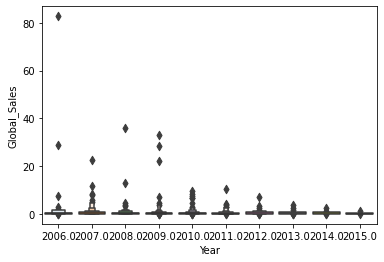

In [83]:
sns.boxenplot(data=df.loc[ df['Platform'] == 'Wii',:], x="Year", y="Global_Sales")

In [14]:
df[['Platform']].value_counts().shape

(31,)

0.748
0.748


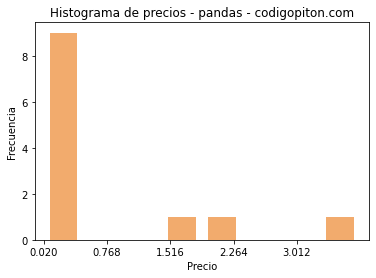

In [90]:
datos =  df.loc[ (df['Platform'] == 'Wii') & (df['Year']==2013.0), 'Global_Sales'];
maximo = np.max(datos)
minimo = np.min(datos)
rango = maximo - minimo
k = 1 + 3.332*np.log10(datos.shape)
k = int(np.round(k))
w = rango/k
print(w)
print(np.round(w,decimals=3))
intervalos = np.arange(minimo, maximo, np.round(w,decimals=3))
# generamos el histograma a partir de los datos
datos.plot.hist(bins=8, color='#F2AB6D', rwidth=0.70)
plt.xticks(intervalos)
plt.ylabel('Frecuencia')
plt.xlabel('Precio')
plt.title('Histograma de precios - pandas - codigopiton.com')

plt.show()

In [99]:
datos =  df.loc[ (df['Platform'] == 'Wii') & (df['Year']==2006.0), ['Platform','Name','Global_Sales']];
datos

,Platform,Name,Global_Sales
0,Wii,Wii Sports,82.74
7,Wii,Wii Play,29.02
100,Wii,The Legend of Zelda: Twilight Princess,7.31
490,Wii,WarioWare: Smooth Moves,2.92
707,Wii,Super Monkey Ball: Banana Blitz,2.27
1139,Wii,Pokemon Battle Revolution,1.61
1340,Wii,Rayman Raving Rabbids,1.44
1525,Wii,Need for Speed Carbon,1.29
2201,Wii,Cars,0.94
2346,Wii,Monster 4X4: World Circuit,0.89
